# Visão Geral

In [1]:

# Importando pacotes úteis
import numpy as np
import pandas as pd
import pandas_bokeh
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
#
import matplotlib.pyplot as plt
#
pandas_bokeh.output_notebook()

Loading BokehJS ...

Para Iniciar nosso estudo vamos, importar ativos do banco de dados do Yahoo Finances. 

In [2]:
#Criando Lista de arquivos
ativos =  ['BRKM5.SA', 'ITUB4.SA', 'VALE3.SA', 'KLBN4.SA','ABEV3.SA','PETR4.SA' ] 

# Data inicial da nossa coleta de dados
data_inicial = '2017-01-01'

# Data final da nossa coleta de dados
data_final = '2023-01-01'

In [3]:
#Utilizando o método pdr.get_data_yahoo para coletar os dados.
Carteira = pdr.get_data_yahoo(ativos, start=data_inicial, end=data_final)
     

[*********************100%***********************]  6 of 6 completed


In [4]:
Carteira.head()

Adj Close                                                       \
             ABEV3.SA   BRKM5.SA   ITUB4.SA  KLBN4.SA  PETR4.SA   VALE3.SA   
Date                                                                         
2017-01-02  13.269143  23.411182  17.418875  2.119946  6.460039  16.725079   
2017-01-03  13.537618  24.746998  18.156578  2.173134  6.830193  17.465893   
2017-01-04  13.431858  24.326977  18.234493  2.142740  6.830193  17.152216   
2017-01-05  13.505075  24.616171  18.483866  2.173134  6.940356  17.806269   
2017-01-06  13.391179  24.134176  18.546200  2.142740  6.900697  17.332413   

                Close                                 ...       Open           \
             ABEV3.SA   BRKM5.SA   ITUB4.SA KLBN4.SA  ...   ITUB4.SA KLBN4.SA   
Date                                                  ...                       
2017-01-02  16.309999  34.000000  22.353333     2.79  ...  22.299999     2.85   
2017-01-03  16.639999  35.939999  23.299999     2.86  ...  22.559999     2.80   
2017-01-04  16.510000  35.330002  23.400000     2.82  ...  23.200001     2.89   
2017-01-05  16.600000  35.750000  23.719999     2.86  ...  23.393333     2.81   
2017-01-06  16.459999  35.049999  23.799999     2.82  ...  23.693333     2.86   

                                  Volume                              \
           PETR4.SA   VALE3.SA  ABEV3.SA BRKM5.SA  ITUB4.SA KLBN4.SA   
Date                                                                   
2017-01-02    14.64  25.280001   4265400   486500   3105150    80600   
2017-01-03    14.95  25.510000   9535500  1377000  25215000    77900   
2017-01-04    15.45  26.059999   9426500  1573000  13619250   237400   
2017-01-05    15.70  25.980000  11555800   997600  21988800   295200   
2017-01-06    15.78  26.290001   7863200   755300  14017650   125200   

                               
            PETR4.SA VALE3.SA  
Date                           
2017-01-02   7525700  1118500  
2017-01-03  39947800  5658500  
2017-01-04  37071700  2144400  
2017-01-05  47586300  4031600  
2017-01-06  25592000  4213500  

[5 rows x 36 columns]

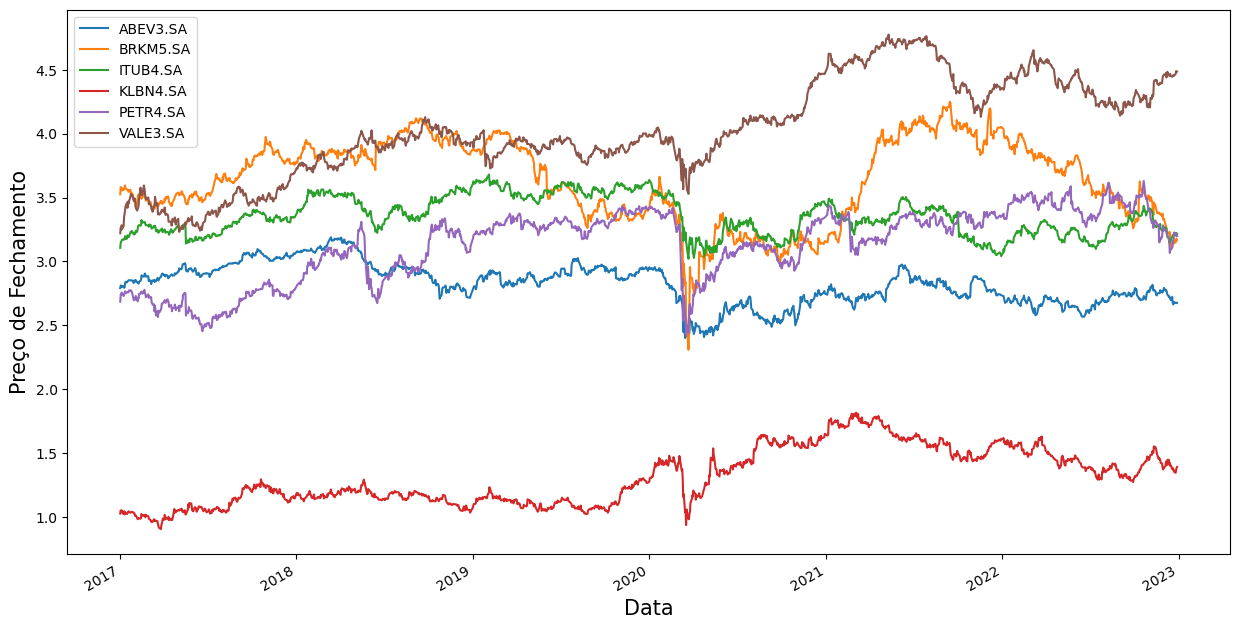

In [5]:
# Para este estudo, podemos nos limitar apenas aos dados de fechamento, dessa forma :
Carteira_fechamento = Carteira['Close'] 


#Plotando o fechamento ao longo dos anos em log.
np.log(Carteira_fechamento).plot(figsize=[15,8])
plt.xlabel('Data',  fontsize=15)
plt.ylabel('Preço de Fechamento',fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc = 'best');
plt.show()

In [6]:
# Para uma visualização mais interativa temos o metodo plot_bokeh()
Carteira_fechamento.plot_bokeh(kind="line"); 

# Fronteira Eficiente

A fronteira eficiente é uma curva que mostra a combinação ótima de ativos que maximiza o retorno esperado para um determinado nível de risco. Ela representa o conjunto de todas as carteiras eficientes que podem ser construídas a partir de um conjunto de ativos financeiros com diferentes níveis de risco e retorno.

### Retorno Esperado

Na teoria da carteira de Markowitz, o retorno esperado de uma carteira é a média ponderada dos retornos esperados de cada ativo financeiro. Onde os pesos são as proporções de cada ativo na carteira.

$R_e =  \sum^n_{i=0} r_{ij}* w_i$                          (1)

Sendo, 

$r_{ij} = \frac{p_j- p_{i}}{p_j}$                          (2)

p é o preço de fechamento referente a um dia. Note que, $i = j=> R_e =0$

Uma maneira de fazer isso como nossa serie temporal de dados, é utilizando o metodo da pct_change(), da biblioteca Pandas. Que calcula a variação percentual de cada indice.

In [7]:
retorno = Carteira_fechamento.pct_change()
retorno

,ABEV3.SA,BRKM5.SA,ITUB4.SA,KLBN4.SA,PETR4.SA,VALE3.SA
Date,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.020233,0.057059,0.042350,0.025090,0.057299,0.044294
2017-01-04,-0.007812,-0.016973,0.004292,-0.013986,0.000000,-0.017959
2017-01-05,0.005451,0.011888,0.013675,0.014184,0.016129,0.038132
2017-01-06,-0.008434,-0.019580,0.003373,-0.013986,-0.005714,-0.026612
...,...,...,...,...,...,...
2022-12-23,0.013870,0.028139,0.015726,-0.015267,0.047103,0.006647
2022-12-26,-0.006840,-0.019368,-0.019849,-0.007752,-0.007166,0.009152
2022-12-27,0.000000,0.027480,-0.005670,0.020833,0.006816,0.023878


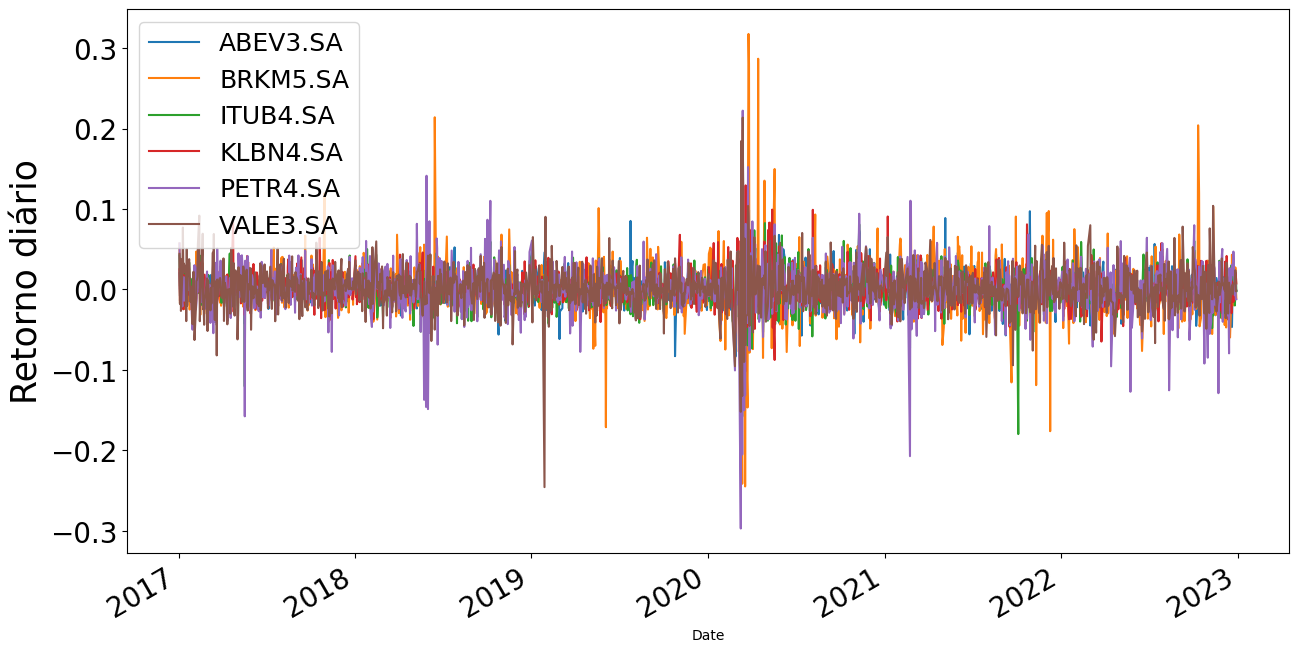

In [8]:

Carteira_fechamento.pct_change().plot(figsize=[15,8]) 
plt.ylabel('Retorno diário',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = 'best', fontsize=18);
plt.show()

### Volatilidade

A volatilidade é uma medida de risco usada na teoria da carteira de Markowitz que indica o grau de flutuação dos retornos de um ativo financeiro ou de uma carteira. Quanto maior a volatilidade, maior o risco envolvido no investimento. A volatilidade é uma das principais variáveis utilizadas para determinar a alocação ótima de ativos, juntamente com o retorno esperado desejado. A minimização da volatilidade para um determinado nível de retorno esperado é um dos objetivos da otimização da carteira de Markowitz.

$\sigma = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu)^2}$


In [9]:
varianca = retorno.var()
varianca

ABEV3.SA    0.000341
BRKM5.SA    0.001133
ITUB4.SA    0.000423
KLBN4.SA    0.000387
PETR4.SA    0.000898
VALE3.SA    0.000664
dtype: float64

In [10]:
Volatilidade = np.sqrt(Carteira_fechamento.var())

In [11]:
Retorno_individual = Carteira_fechamento.resample('250D').last().pct_change().mean()

In [12]:
Matriz_cov =np.array(Carteira_fechamento.pct_change().cov())

In [13]:
def retorno_carteira(pesos,retorno_individual):
    return sum([peso[i]*retorno_individual[i] for i in range(len(pesos))])

In [14]:
def DesvioPadrao_carteira(pesos,Matriz_cov):
    return  np.dot(np.dot(pesos,Matriz_cov),pesos)

Com a volatilidade e retorno esperado, podemos gerar uma distribuição de carteiras e verificar a formação da fronteira eficiente

In [15]:
Retorno = []
pesos_portifolio =  []
Risco =  []
for i in range(300000):
    peso = np.random.random(len(ativos))
    peso =  peso/sum(peso)
    pesos_portifolio.append(peso)
    Retorno.append(retorno_carteira(peso,Retorno_individual))
    Risco.append(DesvioPadrao_carteira(peso,Matriz_cov)*np.sqrt(250))
    

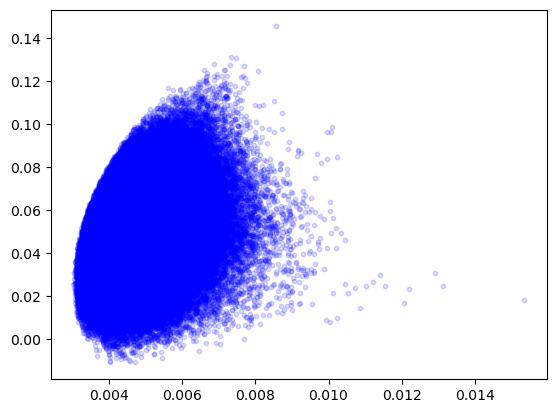

In [23]:
plt.scatter(Risco, Retorno,  marker='o', color ='blue',s=10, alpha=0.15)



## Encontrando a melhor combinação de Ativos com VQE e QAOA

De maneira ideal, o que se faz é na prática é encontrar a melhor combinação de pesos para cada ativo utilizando um ativo livre de risco como é o caso do CDI, IPCA e poupança. Para uma carteira combinada livre de risco, podemos mostrar que o retorno esperado é dado pela seguinte equação:

$R_p = R_f +\frac{(R_M - R_f)}{\sigma_M}*\sigma_p$   (3)

onde,
- $R_p$ é o retorno esperado da carteira ótima;
- $R_f$ é a taxa livre de risco, que representa o retorno de um ativo sem risco; 
- $R_m$ é o retorno esperado do mercado, que representa o retorno médio de todos os ativos de risco disponíveis;
- $\sigma_p$ é o risco (ou volatilidade) da carteira ótima;
- $\sigma_M$ é o risco (ou volatilidade) dos ativos que possuem risco associado.

A equação (3) descreve a Capital Market Line (CML), que é uma linha reta no gráfico de alocação de ativos que indica a combinação ótima de ativos de risco e ativos sem risco, levando em conta a relação entre o retorno esperado e o risco da carteira.

Encontrar a melhor CML, é um problema de otimização para enontrar qual o melhor coeficiente angular desta reta. Ou seja, o problema se resume a maximizar o Indice Sharpe. No entanto, o problema que vamos tratar com algorimos quânticos é diferente. Pois, queremos encontrar a solução para a equação:


 $ \displaystyle \min_{x,\in \{0,1\}^n} qx^T\sigma x -\mu^Tx$        (4)

com a seguinte restrição :

$1^Tx=B$  (5)

Sendo, 

- $q$: é um fator que define a aversão ao risco do investidor, representando a relação entre o retorno esperado e o risco da carteira.
- $x$: é um vetor coluna com as alocações dos ativos na carteira.
- $\sigma$: é a matriz de covariância dos retornos dos ativos na carteira, que representa a variação conjunta dos retornos dos ativos.
- $\mu$: é o vetor coluna de retornos esperados dos ativos na carteira.

A expressão $qx^T\sigma x$ representa o risco da carteira, enquanto$ - \mu^T x$ representa o retorno esperado da carteira. O objetivo da otimização de carteira é encontrar as alocações de ativos que maximizem o retorno esperado para um determinado nível de risco, ou minimizem o risco para um determinado nível de retorno esperado.

A restrição $1^T x = B$,no contexto da otimização de carteira de Markowitz, significa que a soma dos pesos dos ativos na carteira (representada pelo vetor x) deve ser igual a um valor B pré-determinado. Isso é necessário porque, na prática, é importante investir todo o dinheiro disponível na carteira, e a restrição $1^T x = B$ garante que isso aconteça. Além disso, essa restrição ajuda a evitar a criação de carteiras extremas com poucos ativos. Por exemplo, se B for igual a 1, então a carteira deve ser formada com todos os ativos disponíveis.

In [17]:
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import RandomDataProvider
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo
import numpy as np
import matplotlib.pyplot as plt
#import datetime

Para resolver a equação (4) com a restrição (3), podemos utilizar o módulo PortfolioOptimization. Para mais detalhes consulte a referencia []

In [25]:
#No construtor do PortfolioOptimization, eu preciso passar os Valores esperados, covariança, fator de risco e Budget
q = 0.5
B =4
Solution  = PortfolioOptimization(Retorno_individual.to_numpy(),Matriz_cov, q,B)

In [27]:
# Resolvendo a equação.
QuadraticProgram = Solution.to_quadratic_program()
QuadraticProgram

<QuadraticProgram: minimize 0.00017065145498211965*x_0^2 + 0.00020778030579350..., 6 variables, 1 constraints, 'Portfolio optimization'>

Vamos Primeiro Encontrar a Solução Clássica para este problma :

 NumPyMinimumEigensolver() é usado para encontrar o menor valor próprio de uma matriz Hermitiana, que é então usada para determinar a solução para um problema de otimização quadrática, enquanto o MinimumEigenOptimizer() é um otimizador do Qiskit que utiliza o NumPyMinimumEigensolver() para resolver problemas de otimização quadrática.

In [29]:
# Solução Clássica:

# NumPyMinimumEigensolver() é usado para encontrar o menor valor próprio de uma matriz Hermitiana
Medida_Classica = NumPyMinimumEigensolver()

#o MinimumEigenOptimizer() é um otimizador do Qiskit que utiliza o NumPyMinimumEigensolver() para resolver problemas de otimização quadrática.
Solução_Classica = MinimumEigenOptimizer(Medida_Classica)

result = Solução_Classica.solve(qp)

print(result)

fval=-0.31455768927395455, x_0=0.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=1.0, x_5=1.0, status=SUCCESS


### Utilizando o VQE

O método VQE (Variational Quantum Eigensolver) é um algoritmo quântico híbrido que combina um circuito quântico variacional com um algoritmo clássico de otimização para encontrar o menor valor próprio de uma matriz hermitiana, que pode ser usada para resolver problemas de otimização, como é o nosso caso.



In [31]:
from qiskit.utils import algorithm_globals

backend = Aer.get_backend("statevector_simulator")

cobyla = COBYLA() # Parte clássica
cobyla.set_options(maxiter=500)
TwoLocal = TwoLocal(4, "ry", "cz", reps=3, entanglement="full")
QuantumInstance = QuantumInstance(backend=backend)
vqe_mes = VQE(TwoLocal, optimizer=cobyla, quantum_instance=QuantumInstance)
vqe = MinimumEigenOptimizer(vqe_mes)
result = vqe.solve(qp)

print(result)

fval=-0.31455768927395455, x_0=0.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=1.0, x_5=1.0, status=SUCCESS


## Utilizando o QAOA

O QAOA (Quantum Approximate Optimization Algorithm) é um algoritmo quântico híbrido usado para resolver problemas de otimização combinatória usando um circuito quântico variacional e um algoritmo clássico de otimização. Podemos entender-lo como sendo um caso Particular do VQE

In [22]:
backend = Aer.get_backend("statevector_simulator")

cobyla = COBYLA()
cobyla.set_options(maxiter=250)
quantum_instance = QuantumInstance(backend=backend)
qaoa_mes = QAOA(optimizer=cobyla, reps=3, quantum_instance=quantum_instance)
qaoa = MinimumEigenOptimizer(qaoa_mes)
result = qaoa.solve(qp)

print(result)

fval=-0.31455768927395455, x_0=0.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=1.0, x_5=1.0, status=SUCCESS


# Referencias

[1] https://www.scielo.br/j/rbef/a/Sm3YDPxqvS77Y5jdmHqz7SF/?lang=pt&format=pdf

[2] https://qiskit.org/documentation/finance/tutorials/01_portfolio_optimization.html